# Importación librerías y datos

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import seaborn as sbn
import matplotlib.pyplot as plt
import mapclassify as mc
import contextily as ctx

In [2]:
# Importar datos
vut = gpd.read_file("data/Cordoba_VUT_Rural_2018.gpkg")
departamentos = gpd.read_file("data/Cordoba_Departamentos.gpkg")

# Visualización simple de datos

In [3]:
vut.head()

vut_dolar                                           geometry
0  127.270256  MULTIPOLYGON (((4243995.115 6586924.957, 42454...
1  138.476760  MULTIPOLYGON (((4241227.340 6579153.336, 42419...
2  140.637871  MULTIPOLYGON (((4238258.119 6570921.229, 42403...
3  145.887050  MULTIPOLYGON (((4235542.676 6559183.764, 42354...
4  147.963800  MULTIPOLYGON (((4235609.230 6556737.273, 42454...

<Axes: xlabel='vut_dolar', ylabel='Count'>

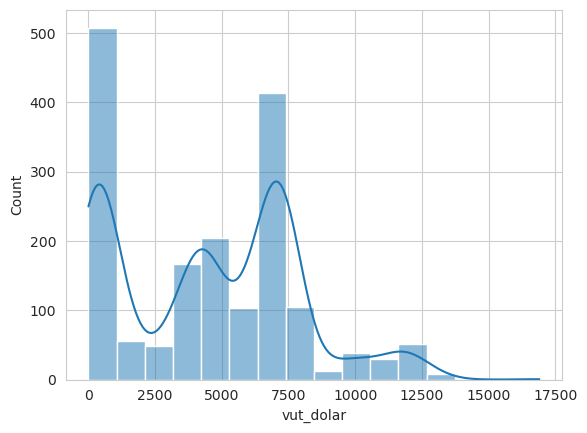

In [4]:
sbn.set_style("whitegrid")
sbn.histplot(vut["vut_dolar"], kde=True)

El histograma y la densidad nos dan una idea de la distribución del "valor". Desde la perspectiva de la ciencia de datos espaciales, también estamos interesados en la distribución espacial de la variable.

# Mapas de coropletas
Un mapa de coropletas (también conocido como mapa coroplético) es un tipo de representación cartográfica que utiliza áreas sombreadas, coloreadas o patrones para mostrar la distribución o variación de un atributo específico en un área geográfica. En este tipo de mapa, se divide el territorio en unidades geográficas, como países, estados, municipios o áreas censales, y se asigna un color o patrón a cada unidad según el valor del atributo que se quiere representar.

El objetivo principal de los mapas de coropletas es resaltar las diferencias cuantitativas entre las áreas geográficas, permitiendo visualizar fácilmente las concentraciones, patrones o tendencias espaciales de un determinado fenómeno o característica.

Realizamos una coropleta por defecto con la función `plot` y añadiendo la variable a representar en el parámetro `column`.

<Axes: >

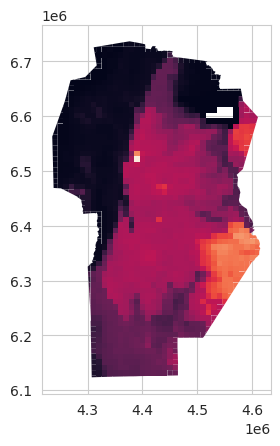

In [5]:
vut.plot(column='vut_dolar', linewidth=0)

Añadimos una leyenda para tener una referencia de valor de cada color:

<Axes: >

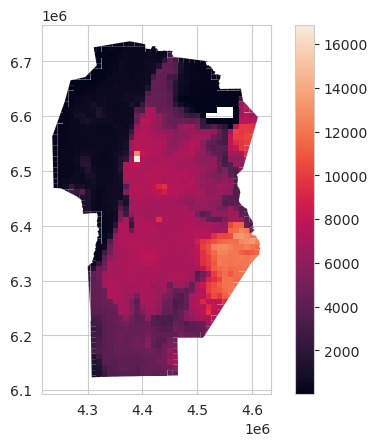

In [6]:
vut.plot(column='vut_dolar', linewidth=0, legend=True)

Podemos cambiar la paleta de colores a partir del parámetro `cmap`. Un listado de gamas permitidas se puede consultar en:
[https://matplotlib.org/stable/tutorials/colors/colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)



<Axes: >

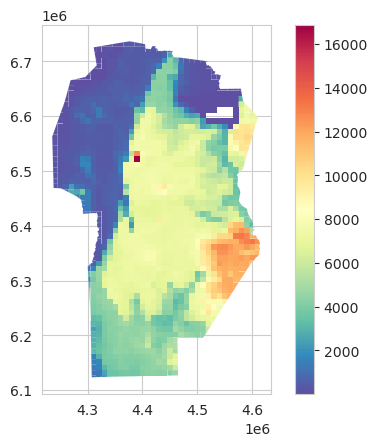

In [7]:
vut.plot(column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r')

Es importante tener en cuenta que los mapas de coropletas pueden generar ciertos sesgos visuales, como ser:

* Sesgo en la percepción: Si las unidades geográficas tienen tamaños muy diferentes, la impresión visual de un área sombreada o coloreada puede sugerir una concentración mayor o menor de lo que realmente es, lo que puede llevar a interpretaciones incorrectas.

* Asignación de clases arbitrarias: La elección de los límites para definir las clases de datos es subjetiva y puede afectar la apariencia del mapa y cómo se perciben las diferencias entre las áreas. Una mala elección de las clases puede distorsionar la interpretación de los patrones espaciales.

* Sensibilidad a cambios en los datos: Pequeñas variaciones en los valores de los datos pueden llevar a cambios significativos en la representación del mapa debido a la discretización. Esto puede dar una impresión de variaciones espaciales exageradas.

## Asignación de clases
GeoPandas admite métodos de clasificación de mapas que están disponibles en PySAL a través de `mapclassify`. Los métodos disponibles son:

In [8]:
mc.CLASSIFIERS

('BoxPlot',
 'EqualInterval',
 'FisherJenks',
 'FisherJenksSampled',
 'HeadTailBreaks',
 'JenksCaspall',
 'JenksCaspallForced',
 'JenksCaspallSampled',
 'MaxP',
 'MaximumBreaks',
 'NaturalBreaks',
 'Quantiles',
 'Percentiles',
 'PrettyBreaks',
 'StdMean',
 'UserDefined')

### Intervalos iguales

In [9]:
clasificacion = mc.EqualInterval(vut['vut_dolar'], k=5)
clasificacion

EqualInterval

      Interval         Count
----------------------------
[    1.00,  3382.00] |   627
( 3382.00,  6763.00] |   523
( 6763.00, 10144.00] |   496
(10144.00, 13525.00] |    98
(13525.00, 16906.00] |     1

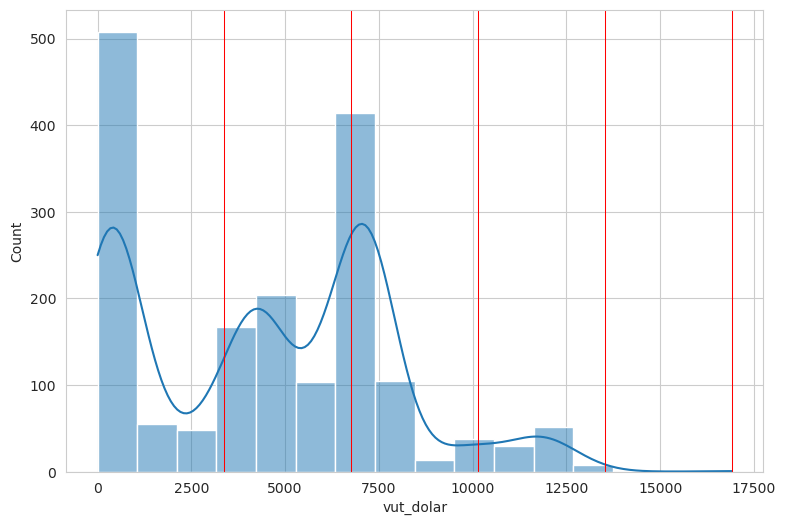

In [10]:
# Configuración figura
f, ax = plt.subplots(1, figsize=(9, 6))
# Distribución de la variable
sbn.histplot(vut["vut_dolar"], kde=True)
# Dibujo de cada límite
for cut in clasificacion.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

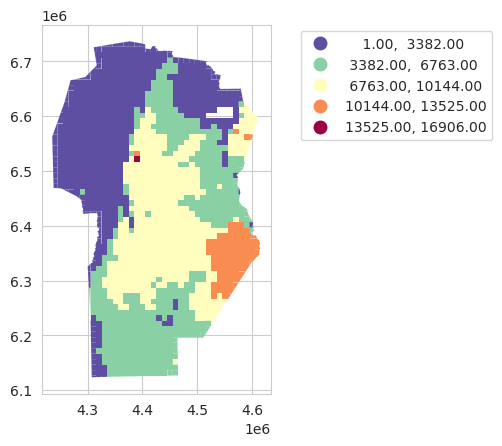

In [11]:
ax = vut.plot(column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r', scheme='EqualInterval')

# Obtener el objeto de la leyenda
leg = ax.get_legend()

# Cambiar la ubicación de la leyenda
leg.set_bbox_to_anchor((2, 1))  # Cambia los valores para ajustar la ubicación

### Cuantiles

In [12]:
clasificacion = mc.Quantiles(vut['vut_dolar'], k=5)
clasificacion

Quantiles

      Interval         Count
----------------------------
[    1.00,   482.88] |   349
(  482.88,  3899.79] |   349
( 3899.79,  6147.93] |   349
( 6147.93,  7237.22] |   349
( 7237.22, 16906.00] |   349

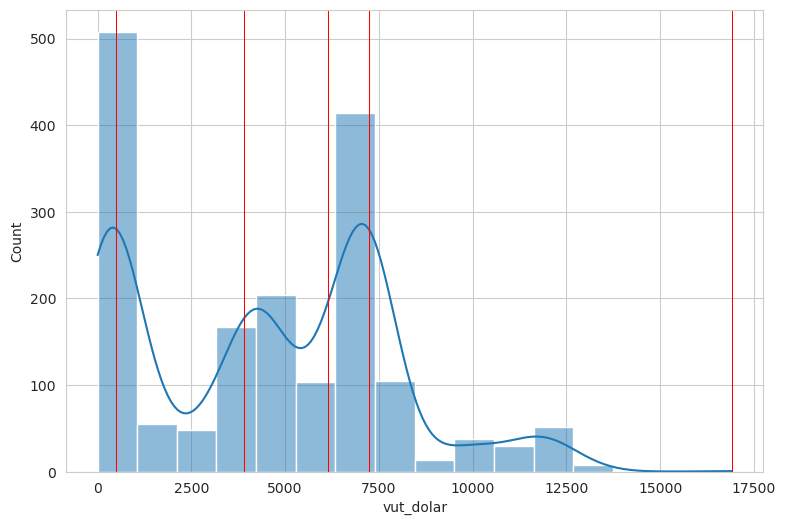

In [13]:
# Configuración figura
f, ax = plt.subplots(1, figsize=(9, 6))
# Distribución de la variable
sbn.histplot(vut["vut_dolar"], kde=True)
# Dibujo de cada límite
for cut in clasificacion.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

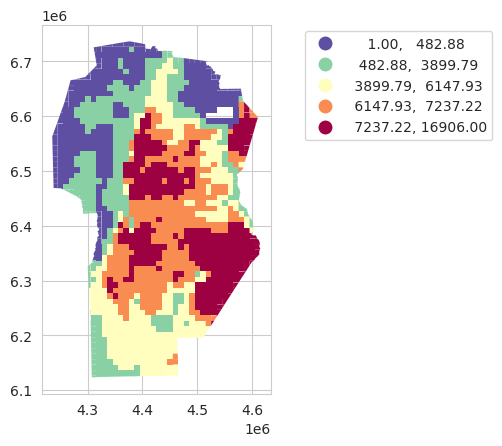

In [14]:
ax = vut.plot(column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r', scheme='Quantiles')

# Obtener el objeto de la leyenda
leg = ax.get_legend()

# Cambiar la ubicación de la leyenda
leg.set_bbox_to_anchor((2, 1))  # Cambia los valores para ajustar la ubicación

### Jenks

In [15]:
clasificacion = mc.JenksCaspall(vut['vut_dolar'], k=5)
clasificacion

JenksCaspall

      Interval         Count
----------------------------
[    1.00,   926.90] |   501
(  926.90,  2884.66] |    89
( 2884.66,  5679.62] |   409
( 5679.62,  9273.47] |   614
( 9273.47, 16906.00] |   132

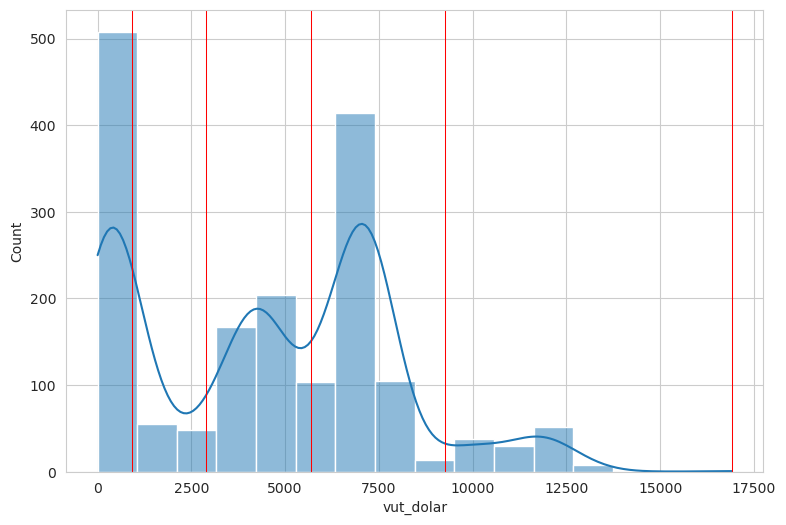

In [16]:
# Configuración figura
f, ax = plt.subplots(1, figsize=(9, 6))
# Distribución de la variable
sbn.histplot(vut["vut_dolar"], kde=True)
# Dibujo de cada límite
for cut in clasificacion.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

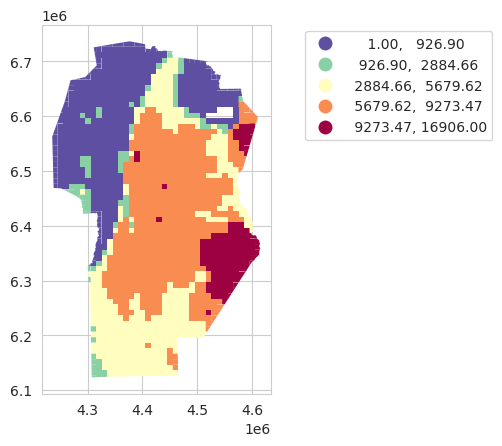

In [17]:
ax = vut.plot(column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r', scheme='JenksCaspall')

# Obtener el objeto de la leyenda
leg = ax.get_legend()

# Cambiar la ubicación de la leyenda
leg.set_bbox_to_anchor((2, 1))  # Cambia los valores para ajustar la ubicación

# Añadiendo contexto a nuestro mapa
Podemos agregar mapas de fondo a través de la librería `contextily`.

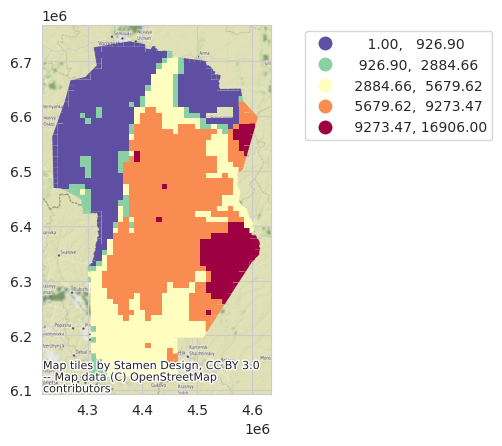

In [18]:
ax = vut.plot(column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r', scheme='JenksCaspall')

# Obtener el objeto de la leyenda
leg = ax.get_legend()

# Cambiar la ubicación de la leyenda
leg.set_bbox_to_anchor((2, 1))  # Cambia los valores para ajustar la ubicación

# Agreado de mapa base por defecto
ctx.add_basemap(ax)

Podemos modificar el mapa base por alguna de las opciones listada aquí:

In [19]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey'])

Muchos de los proveedores tienen multiples opciones de estilos sobre un mapa base. Podemos ver esas opciones desde:

In [20]:
ctx.providers.Stamen.keys()

dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TerrainLabels', 'TopOSMRelief', 'TopOSMFeatures'])

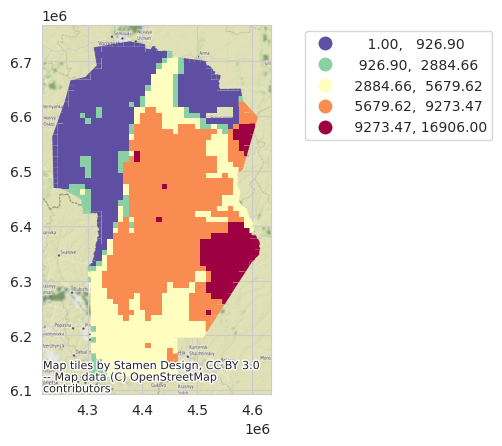

In [21]:
ax = vut.plot(column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r', scheme='JenksCaspall')

# Obtener el objeto de la leyenda
leg = ax.get_legend()

# Cambiar la ubicación de la leyenda
leg.set_bbox_to_anchor((2, 1))  # Cambia los valores para ajustar la ubicación

# Agreado de mapa base por defecto
ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain)

Puede previsualizar algunos mapas base a través de este link:

[http://leaflet-extras.github.io/leaflet-providers/preview/index.html](http://leaflet-extras.github.io/leaflet-providers/preview/index.html)



# Preparación para salida cartográfica

In [ ]:
!pip install matplotlib_scalebar

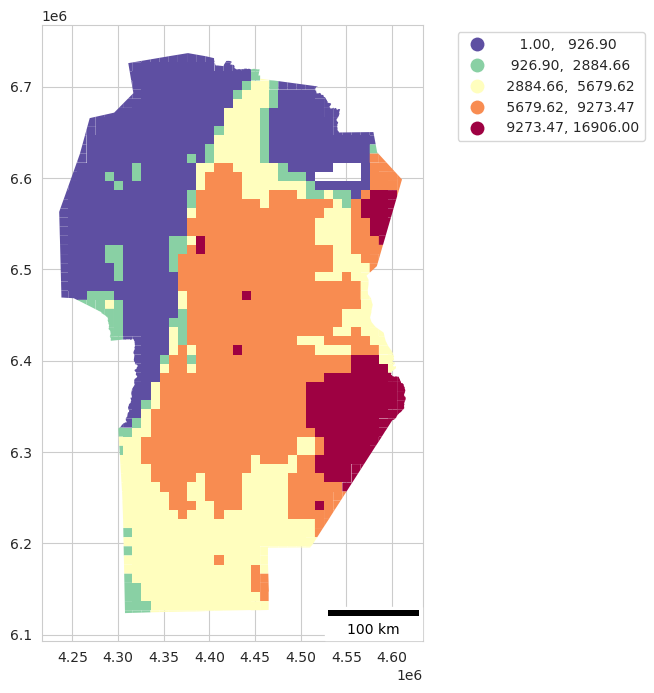

In [23]:
from matplotlib_scalebar.scalebar import ScaleBar

# Crear una figura y ejes de matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Plotear el GeoDataFrame en los ejes
vut.plot(ax=ax, column='vut_dolar', linewidth=0, legend=True, cmap='Spectral_r', scheme='JenksCaspall')

# Agregar una escala gráfica en la esquina inferior derecha
scalebar = ScaleBar(1, location='lower right', units='m', scale_loc='bottom', length_fraction=0.25, height_fraction=0.01)
ax.add_artist(scalebar)

# Obtener el objeto de la leyenda
leg = ax.get_legend()

# Cambiar la ubicación de la leyenda
leg.set_bbox_to_anchor((1.6, 1))  # Cambia los valores para ajustar la ubicación

# Mostrar el mapa
plt.show()

# Mapas interactivos

Folium es la librería que trabaja sobre el método `explore` de Geopandas. Folium es una biblioteca de Python que permite crear mapas interactivos y atractivos utilizando la popular biblioteca de visualización de datos, Leaflet.js. Leaflet.js es una biblioteca de JavaScript ampliamente utilizada para crear mapas interactivos en páginas web.

In [24]:
import folium

mapa = vut.explore(
    
    # Parámetros generales del mapa
    tiles="CartoDB.Positron",
    legend=True,  # Mostrar leyenda
    tooltip=True,  # Info al pasar por objetos
    popup=["vut_dolar"],  # Info al hacer clic
    
    # Parámetros de la capa
    column="vut_dolar",  # Columna para coropleta
    scheme="naturalbreaks",  # Método de mapclassify
    k=5,  # Cantidad de datos
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="VUT Rural",  # Nombre del layer en el mapa
)

mapa # Mostrar mapa

Podemos añadir una capa nueva al objeto `mapa` y un control de capas.

In [25]:
departamentos.explore(
    m=mapa,  # pass the map object
    style_kwds=dict(stroke=True, # Habilitar borde
                    weight=1, # Grosor en px del borde
                    color = 'white', # Color del borde
                    fill=False), # Habilitar relleno
    name="Departamentos",  # name of the layer in the map
)

folium.LayerControl().add_to(mapa)  # use folium to add layer control

mapa